In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import warnings

warnings.filterwarnings("ignore")

# -------------------- Load Data --------------------
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv"
data = pd.read_csv(url)

print("Dataset Overview:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Remove ID column if present
if "ID" in data.columns:
    data.drop(columns="ID", inplace=True)

# Handle missing values
if "Health_Issues" in data.columns:
    data["Health_Issues"].fillna("None", inplace=True)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoki

In [5]:
# -------------------- Encoding --------------------
dataset = data.copy()

# Ordinal mappings
sleep_map = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}
stress_map = {"Low": 1, "Medium": 2, "High": 3}
issues_map = {"None": 1, "Mild": 2, "Moderate": 3, "Severe": 4}

dataset["Sleep_Quality"] = dataset["Sleep_Quality"].map(sleep_map)
dataset["Stress_Level"] = dataset["Stress_Level"].map(stress_map)
dataset["Health_Issues"] = dataset["Health_Issues"].map(issues_map)

# One-hot encode nominal features
categorical_cols = ["Gender", "Country", "Occupation", "Smoking", "Alcohol_Consumption"]
dataset = pd.get_dummies(dataset, columns=categorical_cols, drop_first=True)

print("\nSample Encoded Data:")
print(dataset.head())


Sample Encoded Data:
   Age  Coffee_Intake  Caffeine_mg  Sleep_Hours  Sleep_Quality   BMI  \
0   40            3.5        328.1          7.5              3  24.9   
1   33            1.0         94.1          6.2              3  20.0   
2   42            5.3        503.7          5.9              2  22.7   
3   53            2.6        249.2          7.3              3  24.7   
4   32            3.1        298.0          5.3              2  24.1   

   Heart_Rate  Stress_Level  Physical_Activity_Hours  Health_Issues  ...  \
0          78             1                     14.5              1  ...   
1          67             1                     11.0              1  ...   
2          59             2                     11.2              2  ...   
3          71             1                      6.6              2  ...   
4          76             2                      8.5              2  ...   

   Country_Sweden  Country_Switzerland  Country_UK  Country_USA  \
0           False    

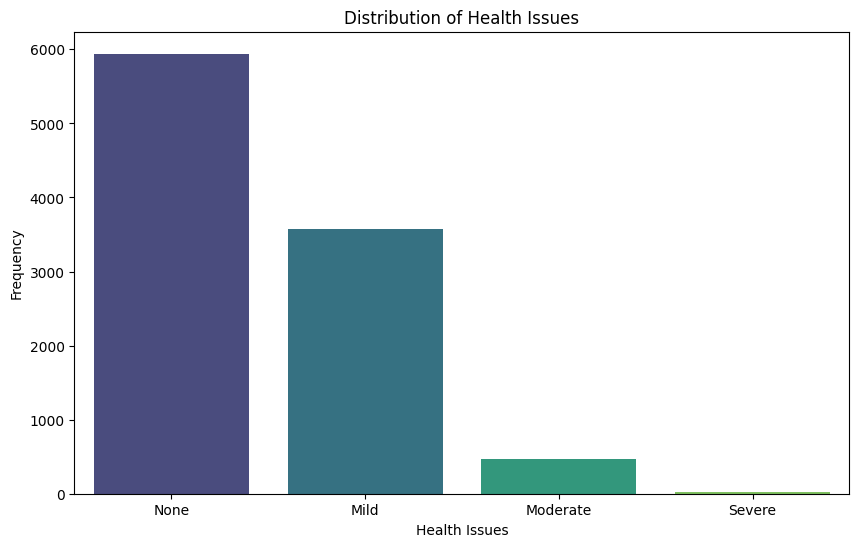

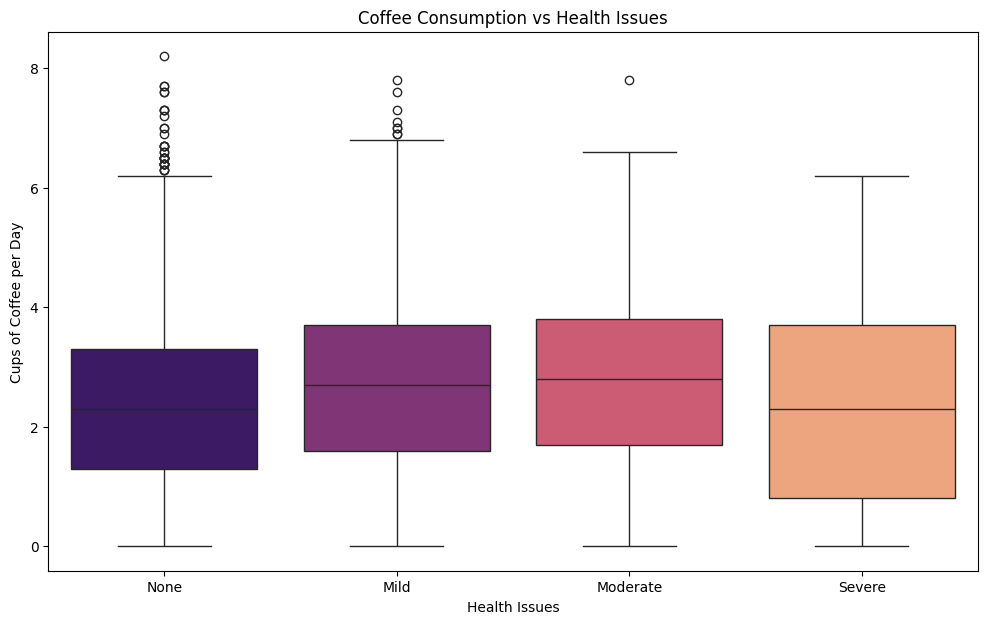

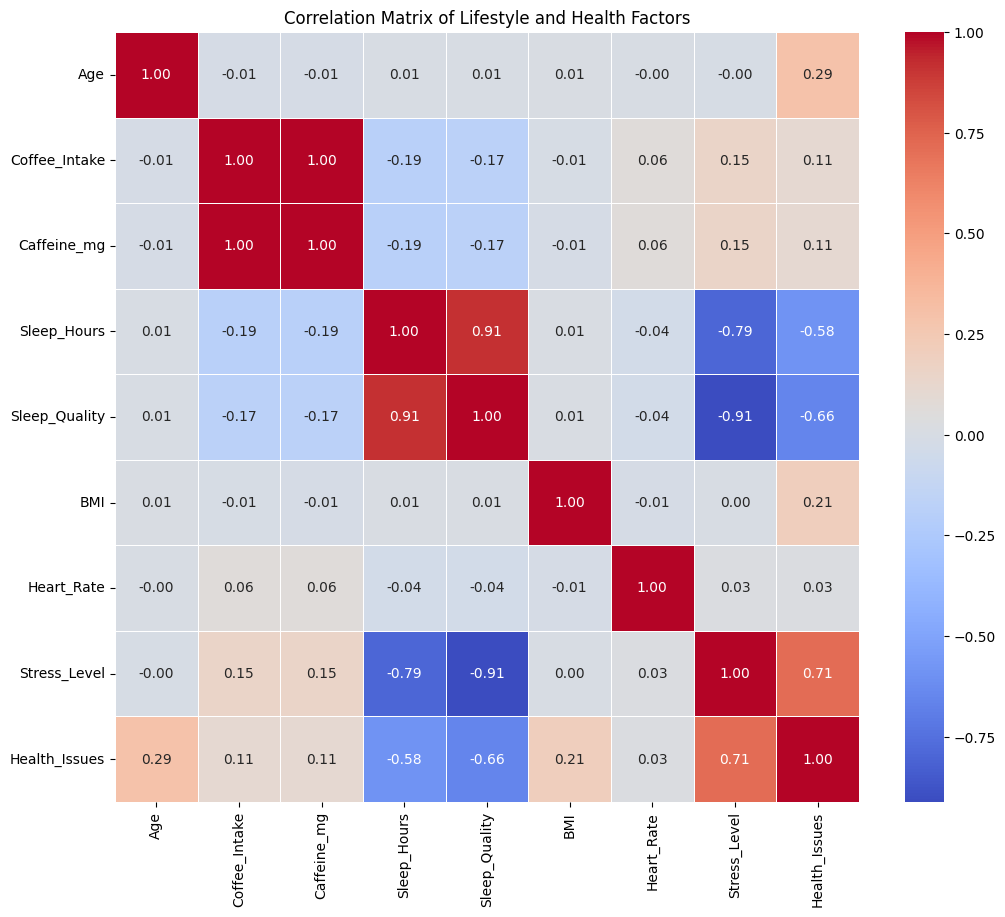

In [6]:
# -------------------- Visualizations --------------------

# Target distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Health_Issues", data=data, order=["None", "Mild", "Moderate", "Severe"], palette="viridis")
plt.title("Distribution of Health Issues")
plt.xlabel("Health Issues")
plt.ylabel("Frequency")
plt.show()

# Coffee intake by health issues
plt.figure(figsize=(12, 7))
sns.boxplot(x="Health_Issues", y="Coffee_Intake", data=data,
            order=["None", "Mild", "Moderate", "Severe"], palette="magma")
plt.title("Coffee Consumption vs Health Issues")
plt.xlabel("Health Issues")
plt.ylabel("Cups of Coffee per Day")
plt.show()

# Correlation matrix (key features only)
corr_features = ["Age", "Coffee_Intake", "Caffeine_mg", "Sleep_Hours",
                 "Sleep_Quality", "BMI", "Heart_Rate", "Stress_Level", "Health_Issues"]
plt.figure(figsize=(12, 10))
sns.heatmap(dataset[corr_features].corr(), annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Lifestyle and Health Factors")
plt.show()

# -------------------- Train/Test Split --------------------
X = dataset.drop("Health_Issues", axis=1)
y = dataset["Health_Issues"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)




In [7]:
# -------------------- Models --------------------

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_preds = tree_clf.predict(X_test)

print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print(classification_report(y_test, tree_preds))

# Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_preds = nb_clf.predict(X_test)

print("\nNaive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print(classification_report(y_test, nb_preds))

print("\nAnalysis complete.")


Decision Tree Performance:
Accuracy: 0.9973333333333333
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1782
           2       1.00      1.00      1.00      1074
           3       0.96      0.99      0.98       139
           4       1.00      1.00      1.00         5

    accuracy                           1.00      3000
   macro avg       0.99      1.00      0.99      3000
weighted avg       1.00      1.00      1.00      3000


Naive Bayes Performance:
Accuracy: 0.675
              precision    recall  f1-score   support

           1       0.85      0.83      0.84      1782
           2       0.90      0.47      0.62      1074
           3       0.24      0.29      0.26       139
           4       0.00      0.40      0.01         5

    accuracy                           0.68      3000
   macro avg       0.50      0.50      0.43      3000
weighted avg       0.84      0.68      0.73      3000


Analysis complete.


In [8]:
# -------------------- Testing New Data --------------------

# New data sample
new_data = {
    'Age': 28,
    'Gender': 'Male',
    'Country': 'Brazil',
    'Occupation': 'Student',
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': 'Poor',
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': 'High',
    'Physical_Activity': 2,
    'Smoking': 'Yes',
    'Alcohol_Consumption': 'Yes'
}

# Convert to DataFrame
new_df = pd.DataFrame([new_data])

# Apply same ordinal encoding
new_df["Sleep_Quality"] = new_df["Sleep_Quality"].map(sleep_map)
new_df["Stress_Level"] = new_df["Stress_Level"].map(stress_map)

# One-hot encoding with alignment
new_df = pd.get_dummies(new_df, columns=categorical_cols, drop_first=True)

# Align with training features (add missing columns, reorder)
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Predict with Decision Tree model
prediction = tree_clf.predict(new_df)[0]

# Convert back to category label
reverse_health_map = {v: k for k, v in issues_map.items()}
predicted_label = reverse_health_map[prediction]

print("\nPrediction for New Data Point:")
print("Predicted Health Issues Level:", predicted_label)



Prediction for New Data Point:
Predicted Health Issues Level: Mild
